In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_digits

In [7]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [9]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

.data gives a 1d array and .images gives a 2d array 

<Figure size 640x480 with 0 Axes>

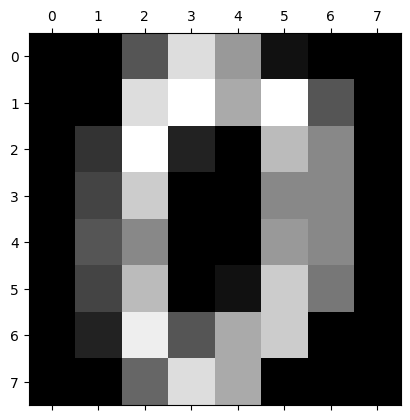

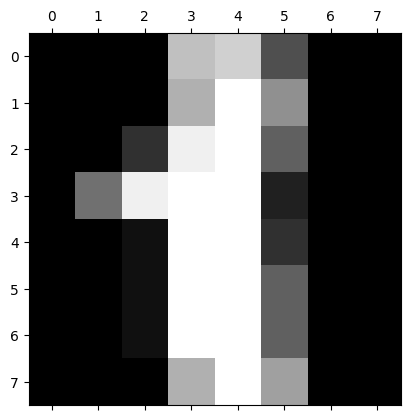

In [18]:
plt.gray()
for i in range(0,2):
    plt.matshow(digits.images[i])

In [19]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [20]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data,digits.target, train_size=0.8)

In [23]:
from sklearn.linear_model import LogisticRegression

In [62]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [63]:
model.score(X_test,Y_test)

0.9611111111111111

Because the features are not scaled so it was taking a lot of iterations, so we had to increase that

In [67]:
model.predict([digits.data[67]])

array([6])

In [68]:
digits.target[67]

6

##### How to know where model did wrong?
We use confusion matrix

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
y_pred = model.predict(X_test)

In [76]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[24,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  1],
       [ 0,  2,  0,  0,  0,  0, 33,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  1],
       [ 1,  2,  2,  0,  0,  2,  0,  0, 24,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 28]], dtype=int64)

In [75]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'Truth')

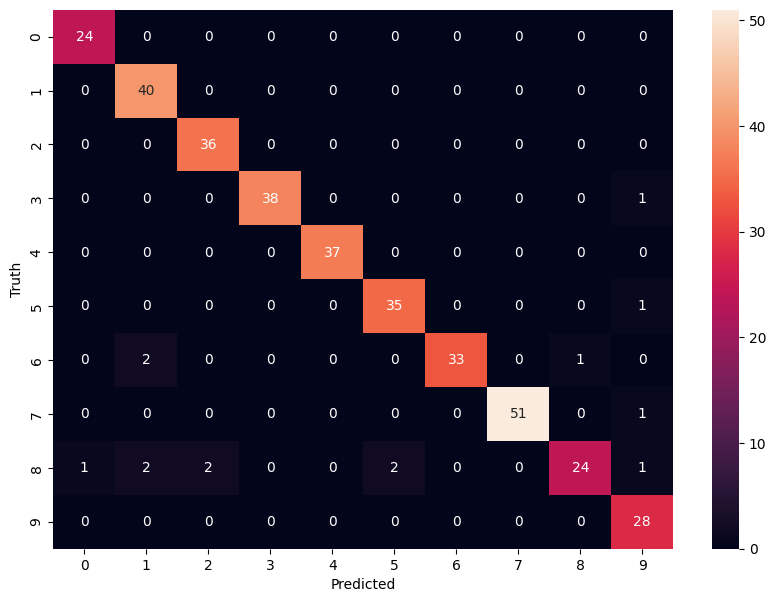

In [78]:
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')